In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(columns=['Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
df.dropna(subset=['Age', 'Embarked'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [6]:
print(df.Sex.unique())

['male' 'female']


In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [8]:
df['Name'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

title_mapping = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Dr': 5,
    'Rev': 6,
    'Col': 7,
    'Major': 8,
    'Mlle': 9,
    'Countess': 10,
    'Ms': 11,
    'Lady': 12,
    'Jonkheer': 13,
    'Don': 14,
    'Capt': 15,
}

df['Name'] = df['Name'].map(title_mapping).astype('Int64')
df['Name'].fillna(0, inplace=True)
print(df['Name'].unique())
df.head()

<IntegerArray>
[1, 3, 2, 4, 14, 6, 5, 0, 11, 8, 12, 9, 7, 15, 13]
Length: 15, dtype: Int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19496\1264070837.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna(0, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,3,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,2,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,3,1,35.0,1,0,113803,53.1000,0
4,5,0,3,1,0,35.0,0,0,373450,8.0500,0


In [9]:
print(df['Ticket'].unique().shape)

(541,)


In [10]:
df.drop(columns=['Ticket'], inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    Int64  
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    int64  
dtypes: Int64(1), float64(2), int64(7)
memory usage: 61.9 KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,7.2500,0
1,2,1,1,3,1,38.0,1,0,71.2833,1
2,3,1,3,2,1,26.0,0,0,7.9250,0
3,4,1,1,3,1,35.0,1,0,53.1000,0
4,5,0,3,1,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,3,1,39.0,0,5,29.1250,2
886,887,0,2,6,0,27.0,0,0,13.0000,0
887,888,1,1,2,1,19.0,0,0,30.0000,0
889,890,1,1,1,0,26.0,0,0,30.0000,1


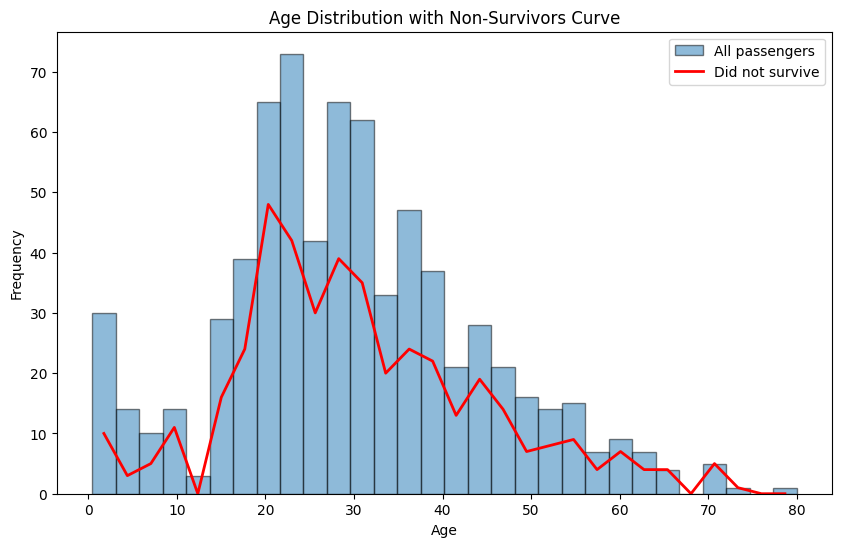

In [11]:
plt.figure(figsize=(10,6))

counts, bins, patches = plt.hist(df['Age'].dropna(), bins=30, edgecolor='black', alpha=0.5, label='All passengers')

non_survived_ages = df.loc[df['Survived'] == 0, 'Age'].dropna()
non_survived_counts, _ = np.histogram(non_survived_ages, bins=bins)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.plot(bin_centers, non_survived_counts, color='red', label='Did not survive', linewidth=2)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Non-Survivors Curve')
plt.legend()
plt.show()

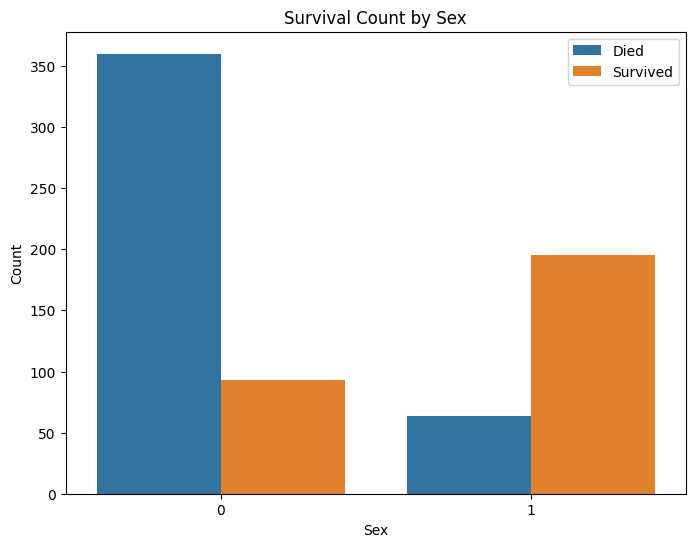

In [12]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, x='Sex', hue='Survived')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(labels=['Died', 'Survived'])
plt.show()

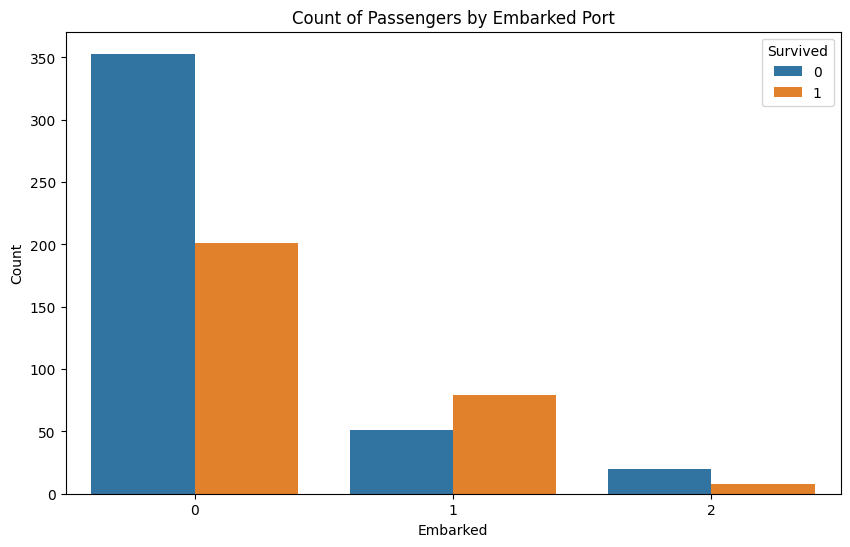

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Count of Passengers by Embarked Port')
plt.show()

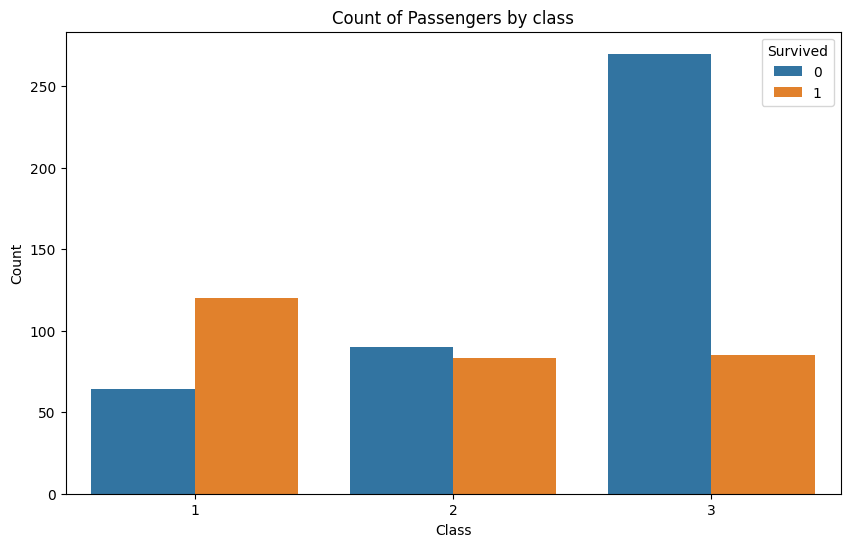

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Passengers by class')
plt.show()

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,7.2500,0
1,2,1,1,3,1,38.0,1,0,71.2833,1
2,3,1,3,2,1,26.0,0,0,7.9250,0
3,4,1,1,3,1,35.0,1,0,53.1000,0
4,5,0,3,1,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,3,1,39.0,0,5,29.1250,2
886,887,0,2,6,0,27.0,0,0,13.0000,0
887,888,1,1,2,1,19.0,0,0,30.0000,0
889,890,1,1,1,0,26.0,0,0,30.0000,1


In [16]:
print(df.SibSp.unique())
print(df.Parch.unique())

[1 0 3 4 2 5]
[0 1 2 5 3 4 6]


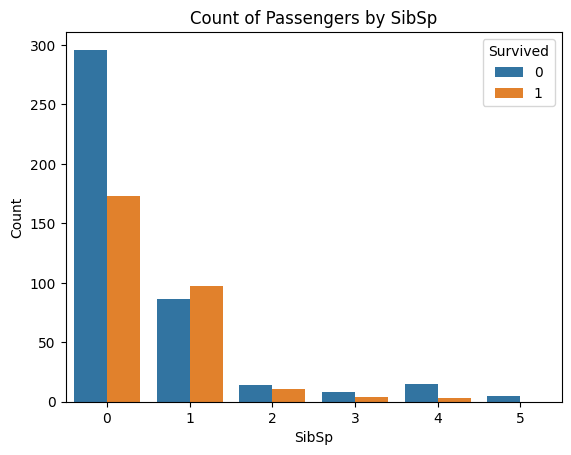

In [17]:
plt.Figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived')

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Count of Passengers by SibSp')
plt.show()


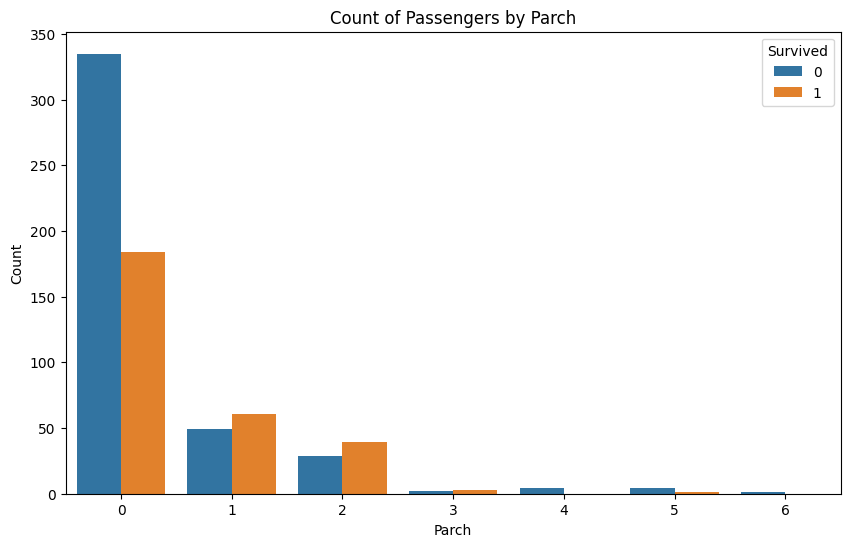

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parch', hue='Survived')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Count of Passengers by Parch')
plt.show()

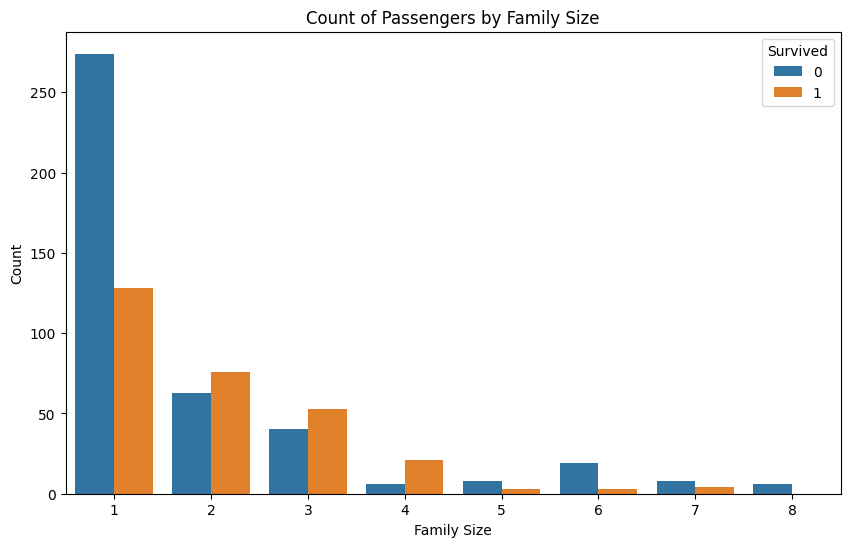

In [19]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_size', hue='Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Passengers by Family Size')
plt.show()

In [20]:
print(df['Fare'].unique())

[  7.25    71.2833   7.925   53.1      8.05    51.8625  21.075   11.1333
  30.0708  16.7     26.55    31.275    7.8542  16.      29.125   18.
  26.      13.       8.0292  35.5     31.3875 263.      27.7208  10.5
  82.1708  52.      11.2417   9.475   21.      41.5792   7.8792  17.8
  39.6875   7.8     76.7292  61.9792   7.2292  27.75    46.9     83.475
  27.9      8.1583   8.6625  73.5     14.4542  56.4958   7.65    29.
  12.475    9.       9.5     47.1     15.85    34.375   61.175   20.575
  34.6542  63.3583  23.       7.8958  77.2875   8.6542   9.825   14.4583
   7.75   247.5208   7.1417   6.975    7.05    14.5     15.0458  26.2833
   9.2167  79.2      6.75    11.5     36.75     7.7958  12.525   66.6
  61.3792   7.7333  16.1     15.75     7.775   20.525   33.5     30.6958
  28.7125   0.      39.      22.025   15.5    146.5208   8.4042   6.4958
   7.225   10.4625  18.7875  31.     113.275   27.      76.2917  90.
   9.35    13.5     26.25    12.275    7.125   52.5542  20.2125  15.2458
 

In [21]:
features = df.drop(columns=['Survived'])
target = df['Survived']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

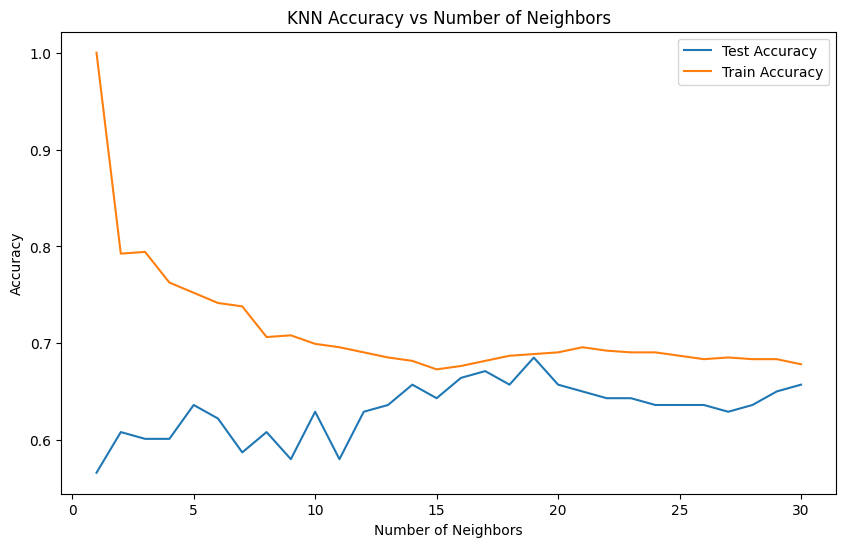

In [23]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_test = {}
accuracy_train = {}
for n in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    accuracy_test[n] = knn.score(X_test, y_test)
    accuracy_train[n] = knn.score(X_train, y_train)
plt.figure(figsize=(10, 6))
plt.plot(accuracy_test.keys(), accuracy_test.values(), label='Test Accuracy')
plt.plot(accuracy_train.keys(), accuracy_train.values(), label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.show()

In [24]:
print("best accuracy:", max(accuracy_test.values()), "with n_neighbors =", max(accuracy_test, key=accuracy_test.get))

best accuracy: 0.6853146853146853 with n_neighbors = 19


In [25]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=100)
logR.fit(X_train, y_train)
pred_logr = logR.predict(X_test)
print("Logistic Regression Accuracy:", logR.score(X_test, y_test))

Logistic Regression Accuracy: 0.7972027972027972


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", rf.score(X_test, y_test))

Random Forest Accuracy: 0.8181818181818182


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", tree_model.score(X_test, y_test))

Decision Tree Accuracy: 0.7552447552447552


In [28]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=5,            # depth of each tree
    learning_rate=0.1,      # shrinkage rate
    subsample=0.8,          # sample ratio of training instances
    colsample_bytree=0.8,   # sample ratio of columns per tree
    random_state=42
)
model.fit(X_train, y_train)
pred_xgb = model.predict(X_test)
print("XGBoost Accuracy:", model.score(X_test, y_test))

XGBoost Accuracy: 0.7762237762237763
